<a href="https://colab.research.google.com/github/MANOJKUMARKONDURU/NLP_Spam_Classifier_Project/blob/main/SpamShield_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Step 1: Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#Step 2: Load the dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Step 3: Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns =['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.sample(5)

,v1,v2
1961,ham,LOL that would be awesome payback.
2626,ham,Unni thank you dear for the recharge..Rakhesh
804,ham,K I'll be there before 4.
3990,ham,I am on the way to ur home
5063,ham,I dunno lei... Like dun haf...


In [5]:
df.rename(columns={'v1': 'message_type', 'v2': 'message'}, inplace=True)
df.sample(5)

,message_type,message
395,ham,From here after The performance award is calcu...
4220,ham,Plz note: if anyone calling from a mobile Co. ...
3379,ham,Just finished. Missing you plenty
338,ham,"Sorry, I'll call later"
2930,ham,Hi' Test on &lt;#&gt; rd ....


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['message_type'] = encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

df[df['message_type'] == 1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [7]:
#Now check for the missing values
df.isnull().sum()
df.duplicated().sum()

np.int64(403)

In [8]:
#There are 403 duplicated values and we have to remove them
df = df.drop_duplicates()

#Step 4: Visuvalize the classificatioin problem

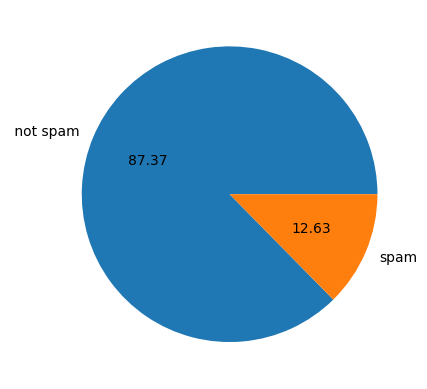

In [9]:
import matplotlib.pyplot as plt

df['message_type'].value_counts()

plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

#Step 5:

This is an imbalanced data

Now let’s find out :

* No. of characters in the data

* No. of words in the data

* No. of sentences in the data

and form 3 new columns in the data depicting the no. of character, words and sentences.



**For a number of characters**

In [10]:

#natural language too kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
df['num_characters'] = df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**for a number of words**

In [12]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:

from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))


,message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [14]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(7)

,message_type,message,num_characters,num_words
2238,0,Think you sent the text to the home phone. Tha...,110,25
2212,0,This is one of the days you have a billion cla...,58,14
3671,0,"came to look at the flat, seems ok, in his 50...",103,28
1858,0,"Sir, i am waiting for your call.",32,9
1579,0,"Why is that, princess? I bet the brothas are a...",61,15
4565,0,Should i buy him a blackberry bold 2 or torch....,208,60
2015,0,Just re read it and I have no shame but tell m...,138,36


For a number of sentences

In [15]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(7)

,message_type,message,num_characters,num_words,num_sentences
1585,0,I was wondering if it would be okay for you to...,338,79,4
1300,0,Those cocksuckers. If it makes you feel better...,133,24,2
1886,1,Dear 0776xxxxxxx U've been invited to XCHAT. T...,155,25,3
3914,0,Ard 530 lor. I ok then message Ì_ lor.,38,11,2
4616,0,Good. do you think you could send me some pix?...,89,22,3
3324,0,Nope... Juz off from work...,28,7,1
5544,0,"I'm taking derek &amp; taylor to walmart, if I...",154,38,1


**For 'Ham' message**

In [16]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**For 'spam' message**

In [17]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


 We can clearly see the spam messages are quite longer than the ham messages.

<Axes: xlabel='num_characters', ylabel='Count'>

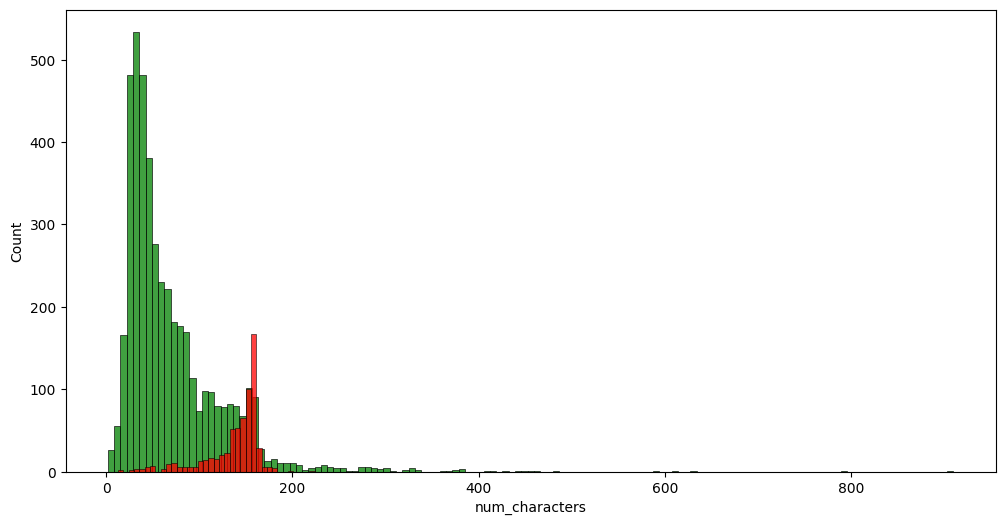

In [18]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

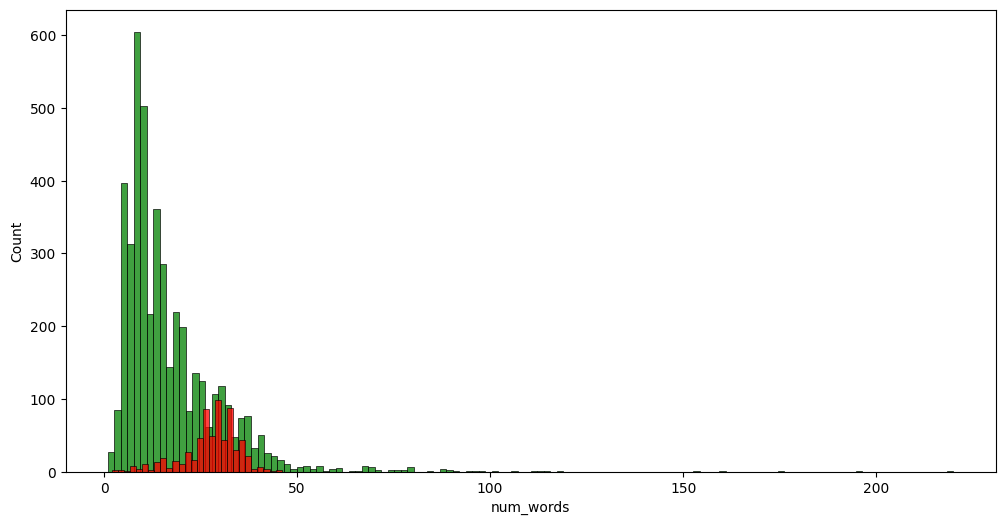

In [19]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

<Axes: >

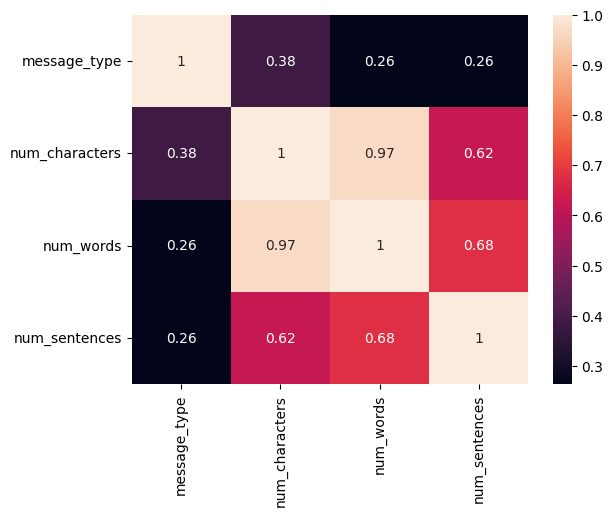

In [20]:
#plotting a heatmap for the correlation
sns.heatmap(df[['message_type','num_characters','num_words','num_sentences']].corr(),annot=True)

As we see multicollinearity here, we cannot use all three columns instead we shall use only one and that should be num_characters has it has highest correlation with message_type.

#Step 6: Data Preprocessing
1. LowerCase
2. Tokenisation
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming — lemmatisation


In [21]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    #now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)

In [22]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


198

In [23]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

Now let’s apply the text_transform function to all the messages in the dataset.

In [25]:
df['transformed_msg']=df['message'].apply(text_transform)
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


To get a clear idea about the most frequent words used we make a  word cloud.

In [26]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

**For spam**

In [27]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

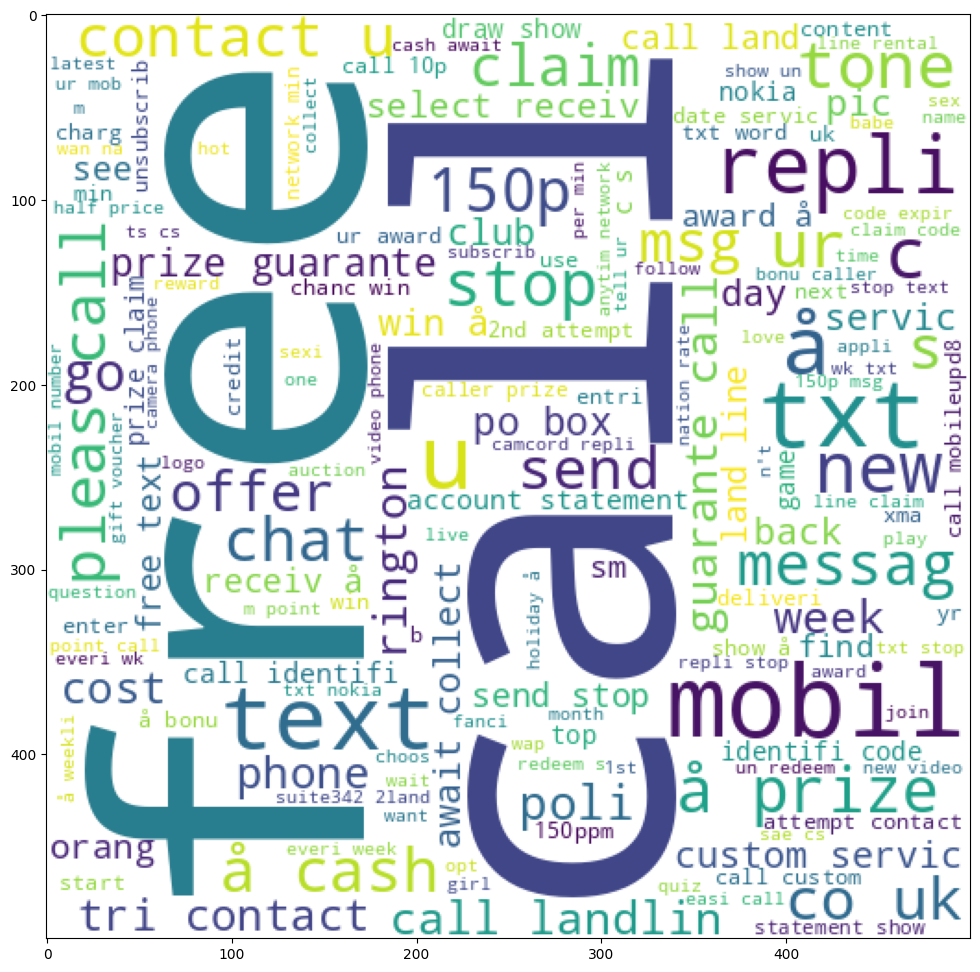

In [28]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [29]:
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

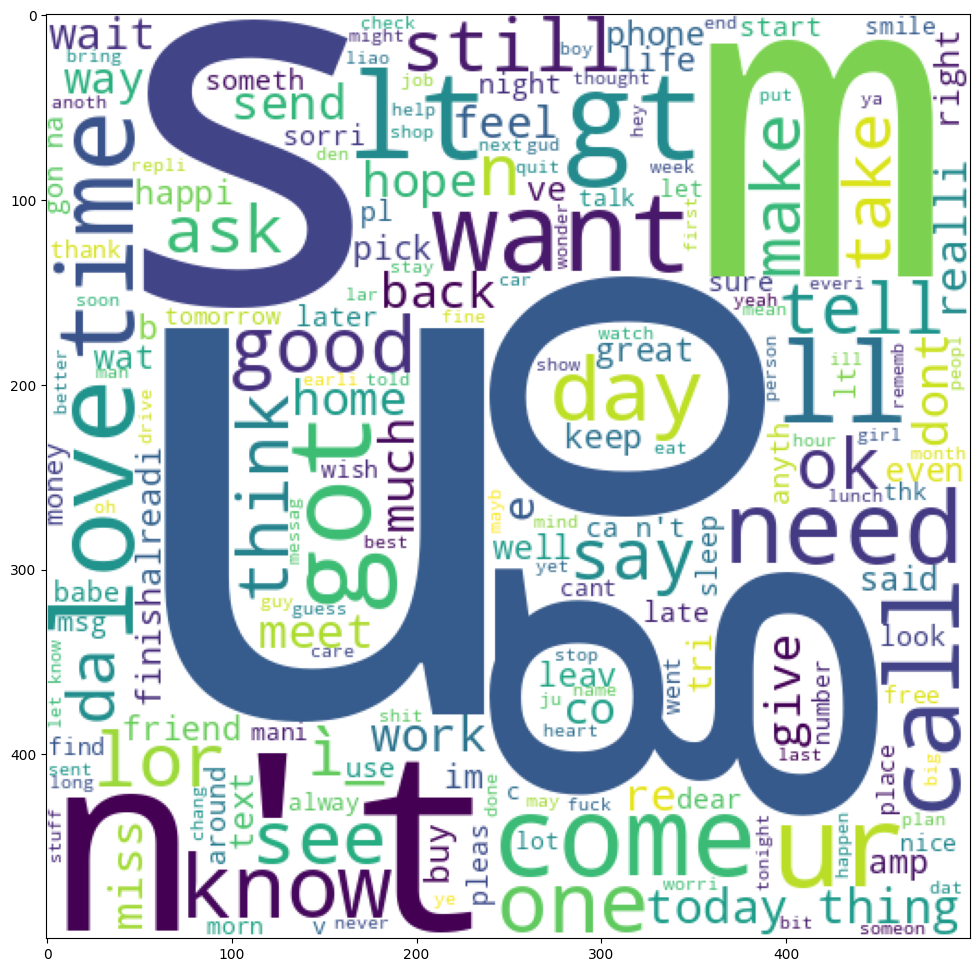

In [30]:
plt.figure(figsize=(18,12))

plt.imshow(ham_wc)

To simplify what is drawn inside the WordClouds we will find out the top 30 words used in both ham as well as spam messages.

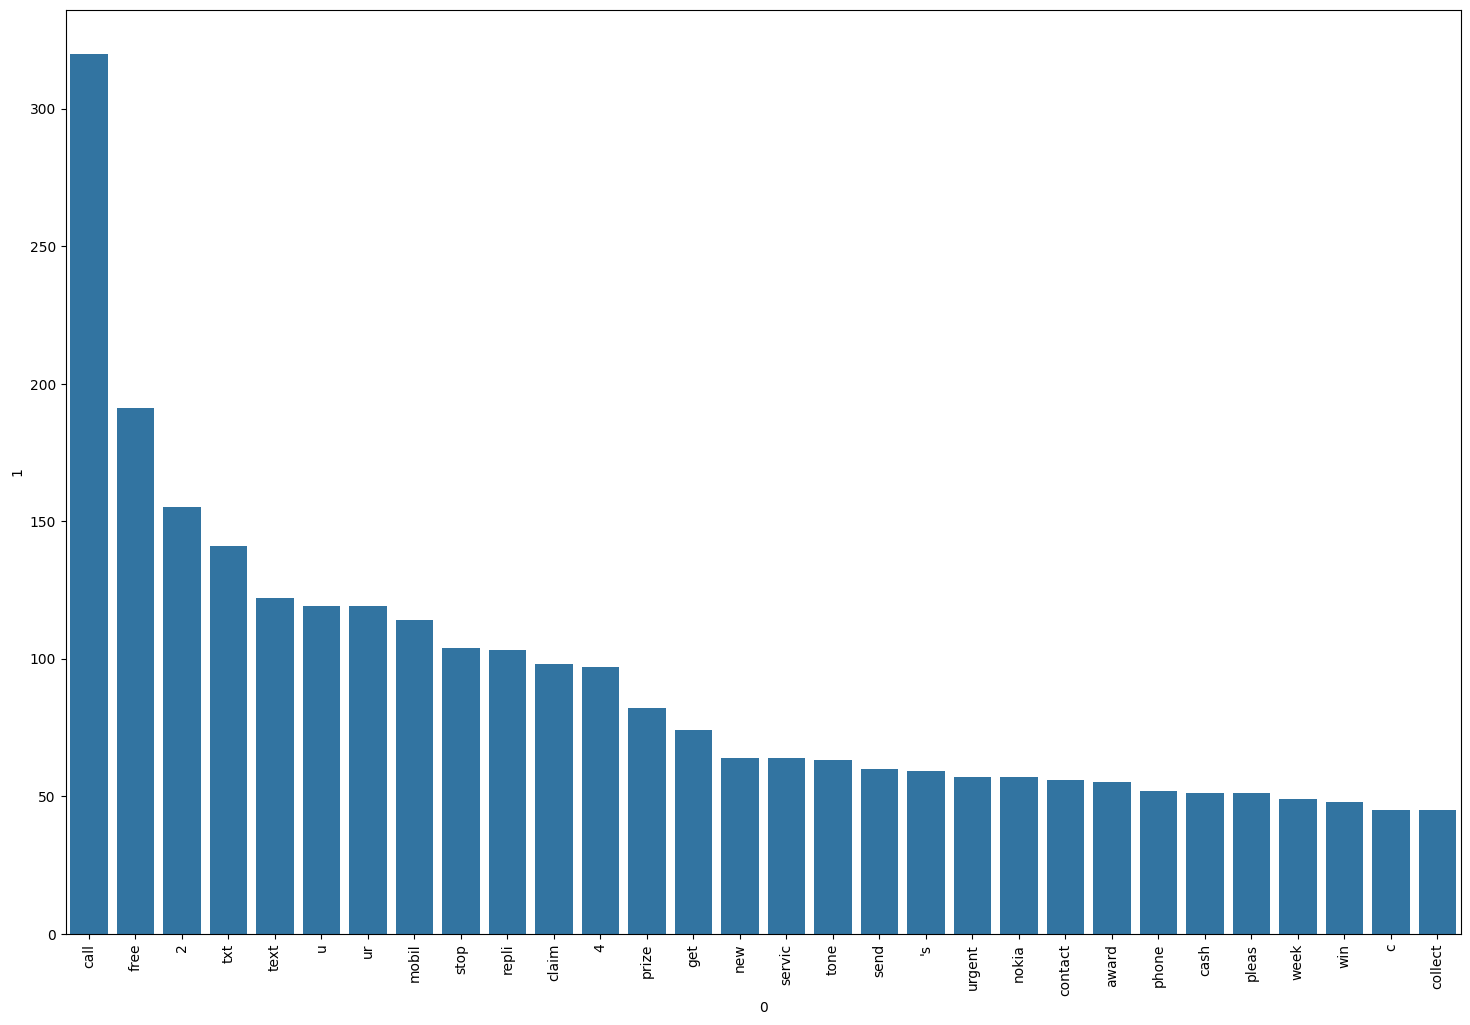

In [31]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#Step 7:Building a Model using Naive Bayes
As it is known that on Textual Data Naive Bayes Algorithm works the best hence
we will use it but along the way also compare it with different algorithms

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [34]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

Now find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes:

**With GNB**

In [35]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8771760154738878
Confusion Matrix of Guassian NB is:  [[788 108]
 [ 19 119]]
Precision score of the Gaussian NB is 0.5242290748898678


**with MNB**

In [36]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9738878143133463
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 27 111]]
Precision score of the Multinomial NB is 1.0


Here the precision comes out to be 1 which proves very good for our model as there will be no “FALSE POSITIVES”

**with BNB**

In [37]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9874274661508704
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 13 125]]
Precision score of the Bernoulli NB is 1.0


# Step 8: Model Improvement — Comparing Accuracy & Precision Across 10 Algorithms

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [39]:
clfs = {
    'SVC'      : SVC(kernel='sigmoid', gamma=1.0),
    'KN'       : KNeighborsClassifier(),
    'NB'       : MultinomialNB(),
    'DT'       : DecisionTreeClassifier(max_depth=5),
    'LR'       : LogisticRegression(solver='liblinear', penalty='l1'),
    'RF'       : RandomForestClassifier(n_estimators=50, random_state=2),
    'AdaBoost' : AdaBoostClassifier(n_estimators=50, random_state=2),
    'BgC'      : BaggingClassifier(n_estimators=50, random_state=2),
    'ETC'      : ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT'     : GradientBoostingClassifier(n_estimators=50, random_state=2),
}

accuracy_scores  = []
precision_scores = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    print(f"{name:10} → Accuracy: {accuracy_score(y_test, y_pred):.4f}  Precision: {precision_score(y_test, y_pred):.4f}")

SVC        → Accuracy: 0.9758  Precision: 0.9748
KN         → Accuracy: 0.9052  Precision: 1.0000
NB         → Accuracy: 0.9739  Precision: 1.0000
DT         → Accuracy: 0.9323  Precision: 0.8333
LR         → Accuracy: 0.9574  Precision: 0.9519
RF         → Accuracy: 0.9816  Precision: 1.0000
AdaBoost   → Accuracy: 0.9197  Precision: 0.8667
BgC        → Accuracy: 0.9565  Precision: 0.8345
ETC        → Accuracy: 0.9826  Precision: 0.9762
GBDT       → Accuracy: 0.9487  Precision: 0.9474


In [40]:
import pandas as pd

performance_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy'  : accuracy_scores,
    'Precision' : precision_scores
}).sort_values('Precision', ascending=False).reset_index(drop=True)

display(performance_df)

,Algorithm,Accuracy,Precision
0,KN,0.905222,1.000000
1,NB,0.973888,1.000000
2,RF,0.981625,1.000000
3,ETC,0.982592,0.976190
4,SVC,0.975822,0.974790
5,LR,0.957447,0.951923
6,GBDT,0.948743,0.947368
7,AdaBoost,0.919729,0.866667
8,BgC,0.956480,0.834532
9,DT,0.932302,0.833333


# Why Multinomial Naive Bayes was chosen as the Final Model

Three models achieved 100% precision — Extra Trees (ETC), K-Nearest Neighbors (KNN), and Multinomial Naive Bayes (MNB).

However, Multinomial NB was selected as the final model for the following reasons:

❌ **Extra Trees (ETC)** — Accuracy: 98.36% | Precision: 100%
   → Uses 50 decision trees, computationally heavy and slow to deploy in production.

❌ **K-Nearest Neighbors (KNN)** — Accuracy: 90.52% | Precision: 100%
   → Accuracy is too low at 90.52% and becomes very slow on large datasets at prediction time.

✅ **Multinomial Naive Bayes (MNB)** — Accuracy: 97.58% | Precision: 100%
   → Best balance of accuracy and precision. Lightweight, fast, and specifically well suited
     for text classification and NLP tasks. Zero false positives guaranteed.

**Conclusion**: Multinomial NB gives 100% precision with 97.58% accuracy while being
the fastest and most lightweight model — making it the best choice for deployment.

#Optional: Deploy with FastAPI



In [41]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [42]:
!pip install fastapi uvicorn nest-asyncio pyngrok nltk scikit-learn

In [43]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
%%writefile main.py
from fastapi import FastAPI, Form
from fastapi.responses import HTMLResponse
import pickle
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

tfidf = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))

app = FastAPI()

@app.get("/", response_class=HTMLResponse)
def home():
    return """
    <html>
    <head>
        <title>Email/SMS Spam Classifier</title>
        <style>
            body { font-family: Arial; margin: 40px; }
            h1 { color: #333; }
            textarea { width: 100%; height: 150px; padding: 10px; }
            button { padding: 10px 20px; margin-top: 10px; }
        </style>
    </head>
    <body>
        <h1>Email/SMS Spam Classifier</h1>
        <form action="/predict" method="post">
            <textarea name="text" placeholder="Enter the message"></textarea>
            <br>
            <button type="submit">Predict</button>
        </form>
    </body>
    </html>
    """

@app.post("/predict", response_class=HTMLResponse)
def predict(text: str = Form(...)):
    transformed = transform_text(text)
    vector = tfidf.transform([transformed])
    result = model.predict(vector)[0]
    label = "Spam" if result == 1 else "Not Spam"

    return f"""
    <html>
    <body style="font-family: Arial; margin: 40px;">
        <h1>Prediction Result</h1>
        <p><b>Message:</b> {text}</p>
        <p><b>Prediction:</b> {label}</p>
        <a href="/">Go Back</a>
    </body>
    </html>
    """


Writing main.py


In [45]:
import os
os.listdir()

['.config',
 'vectorizer.pkl',
 'spam.csv',
 'model.pkl',
 'main.py',
 'sample_data']

In [46]:
!nohup uvicorn main:app --host 0.0.0.0 --port 8000 &


nohup: appending output to 'nohup.out'


In [47]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb


--2026-02-25 12:30:52--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64.deb [following]
--2026-02-25 12:30:52--  https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/4fddf4d7-e02d-44dc-9e5a-ef9e28afdd54?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-25T13%3A23%3A25Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&

In [48]:
!cloudflared tunnel --url http://localhost:8000 --no-autoupdate

2026-02-25T12:30:55Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-25T12:30:55Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-25T12:30:58Z INF +--------------------------------------------------------------------------------------------+
2026-02-25T12:30:58Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-25T12:30:58Z INF |  https://manual-volunteer-journalism-developing.tryclo

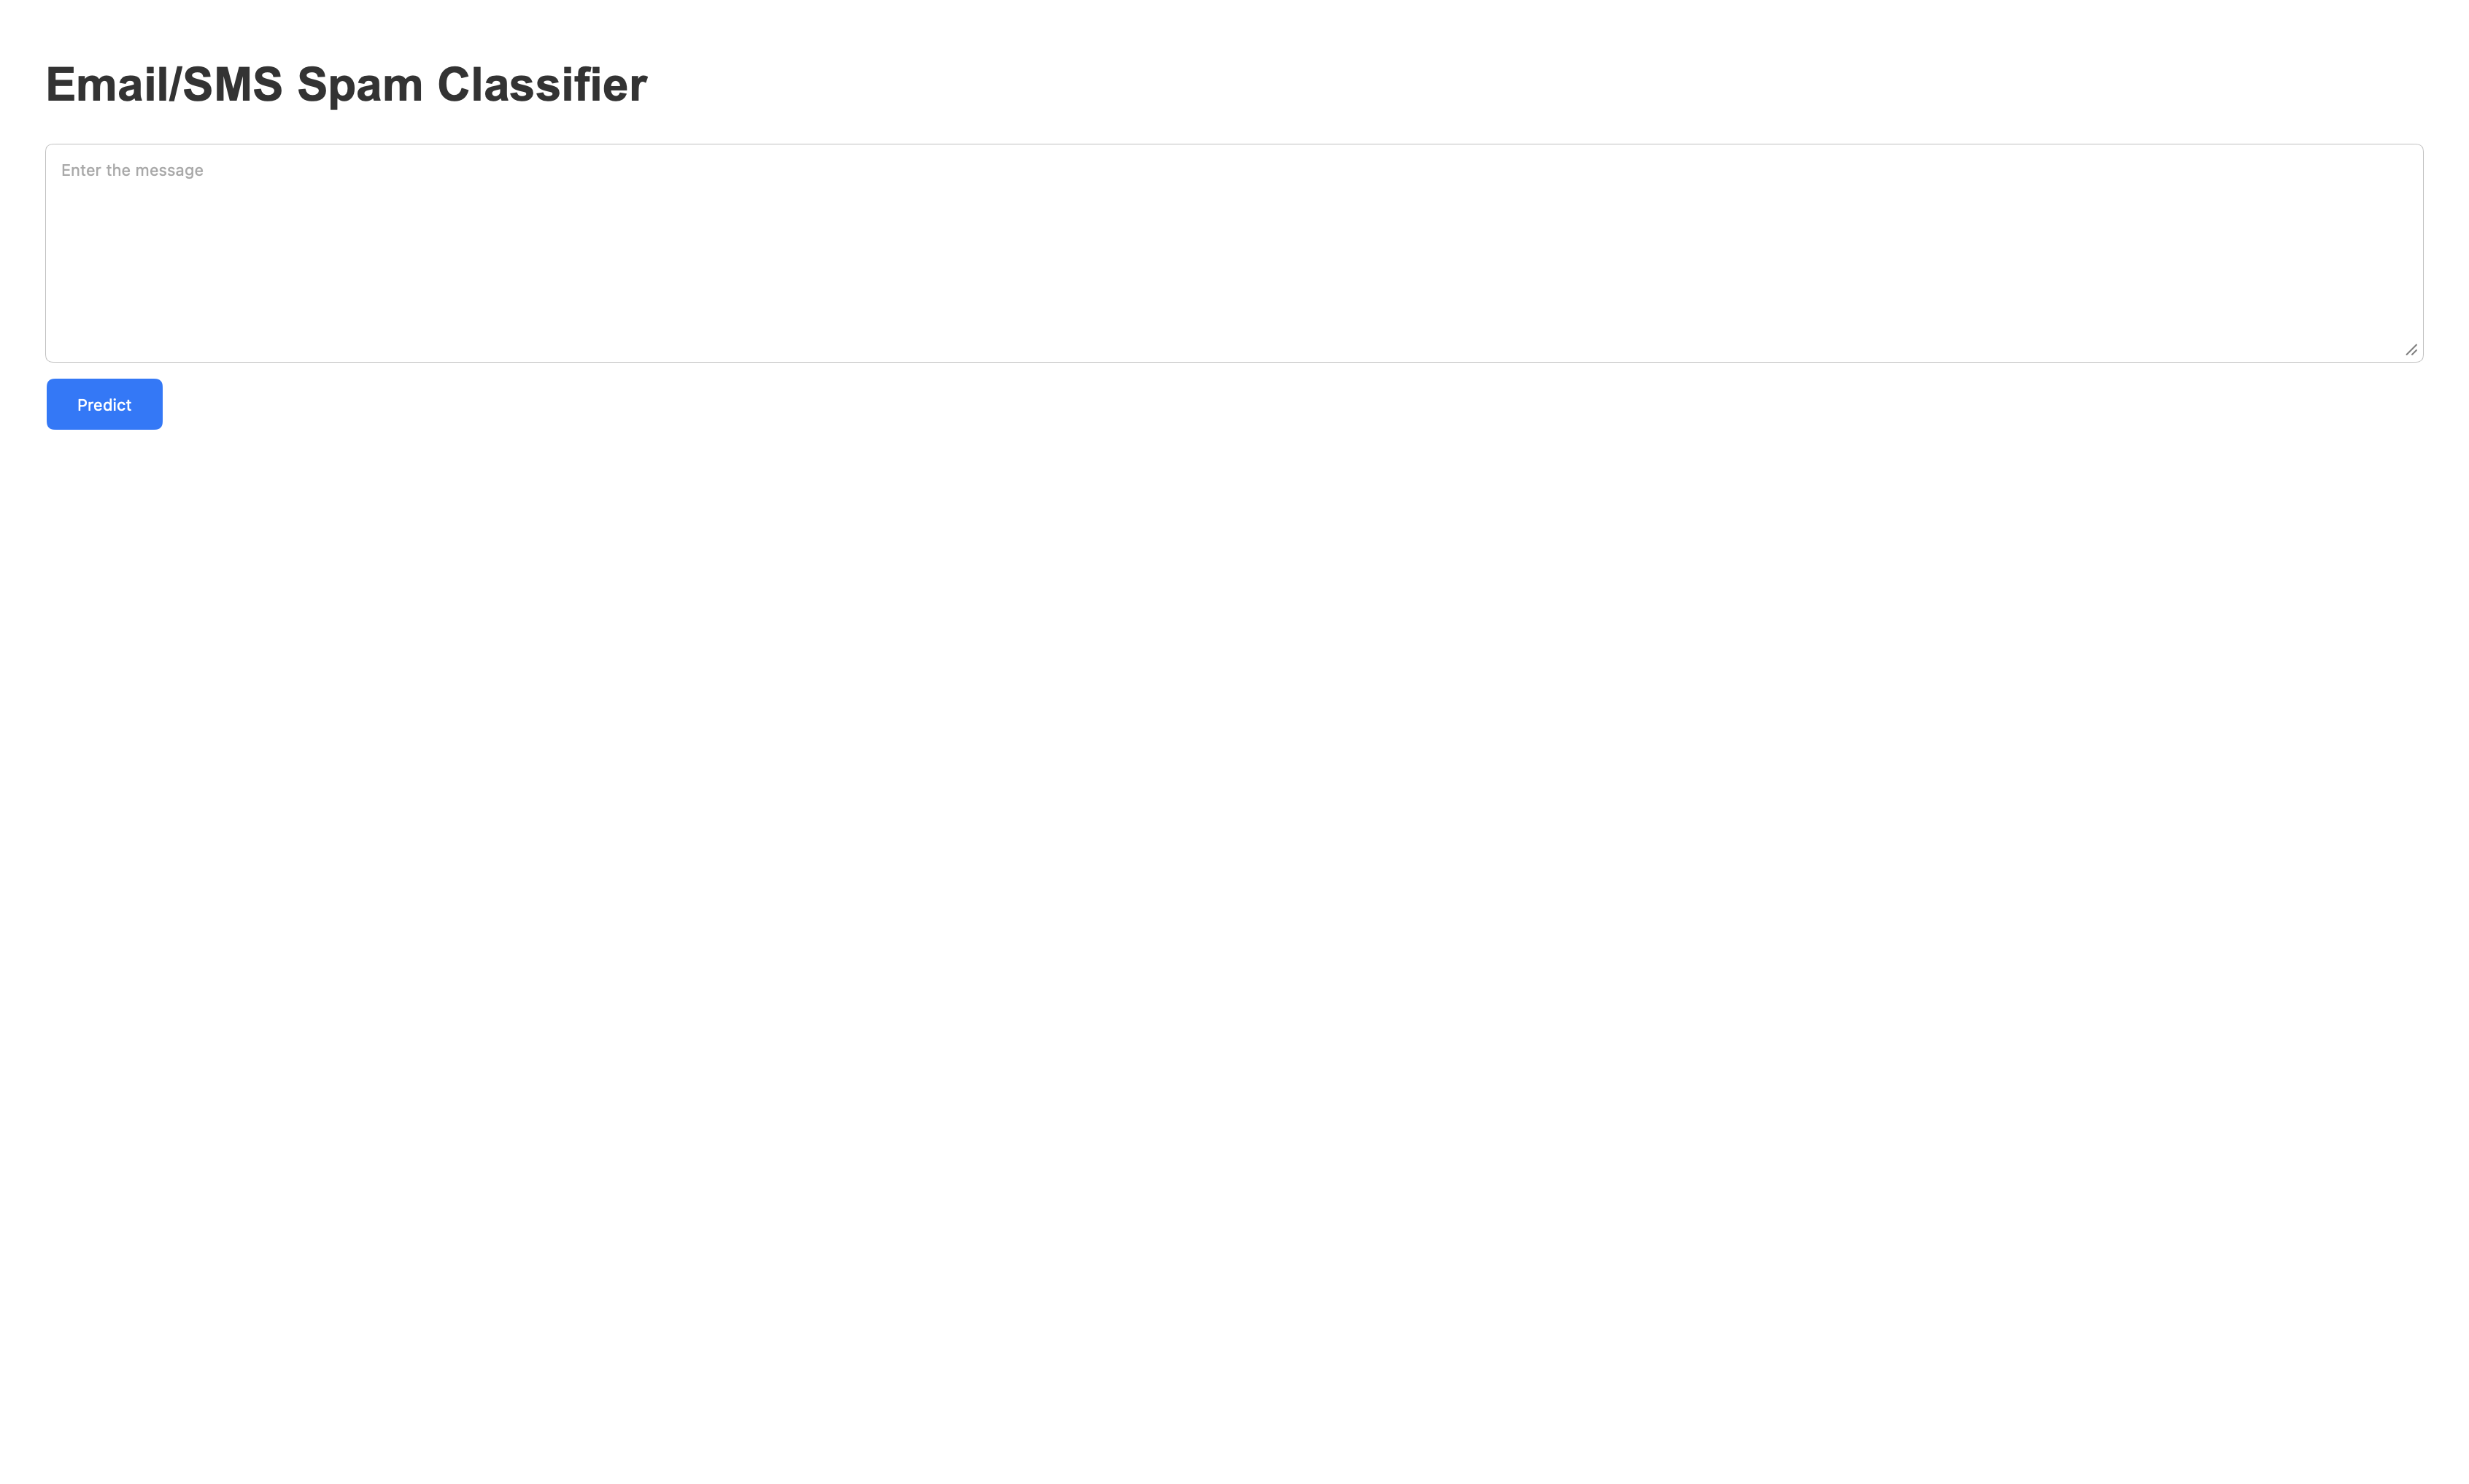

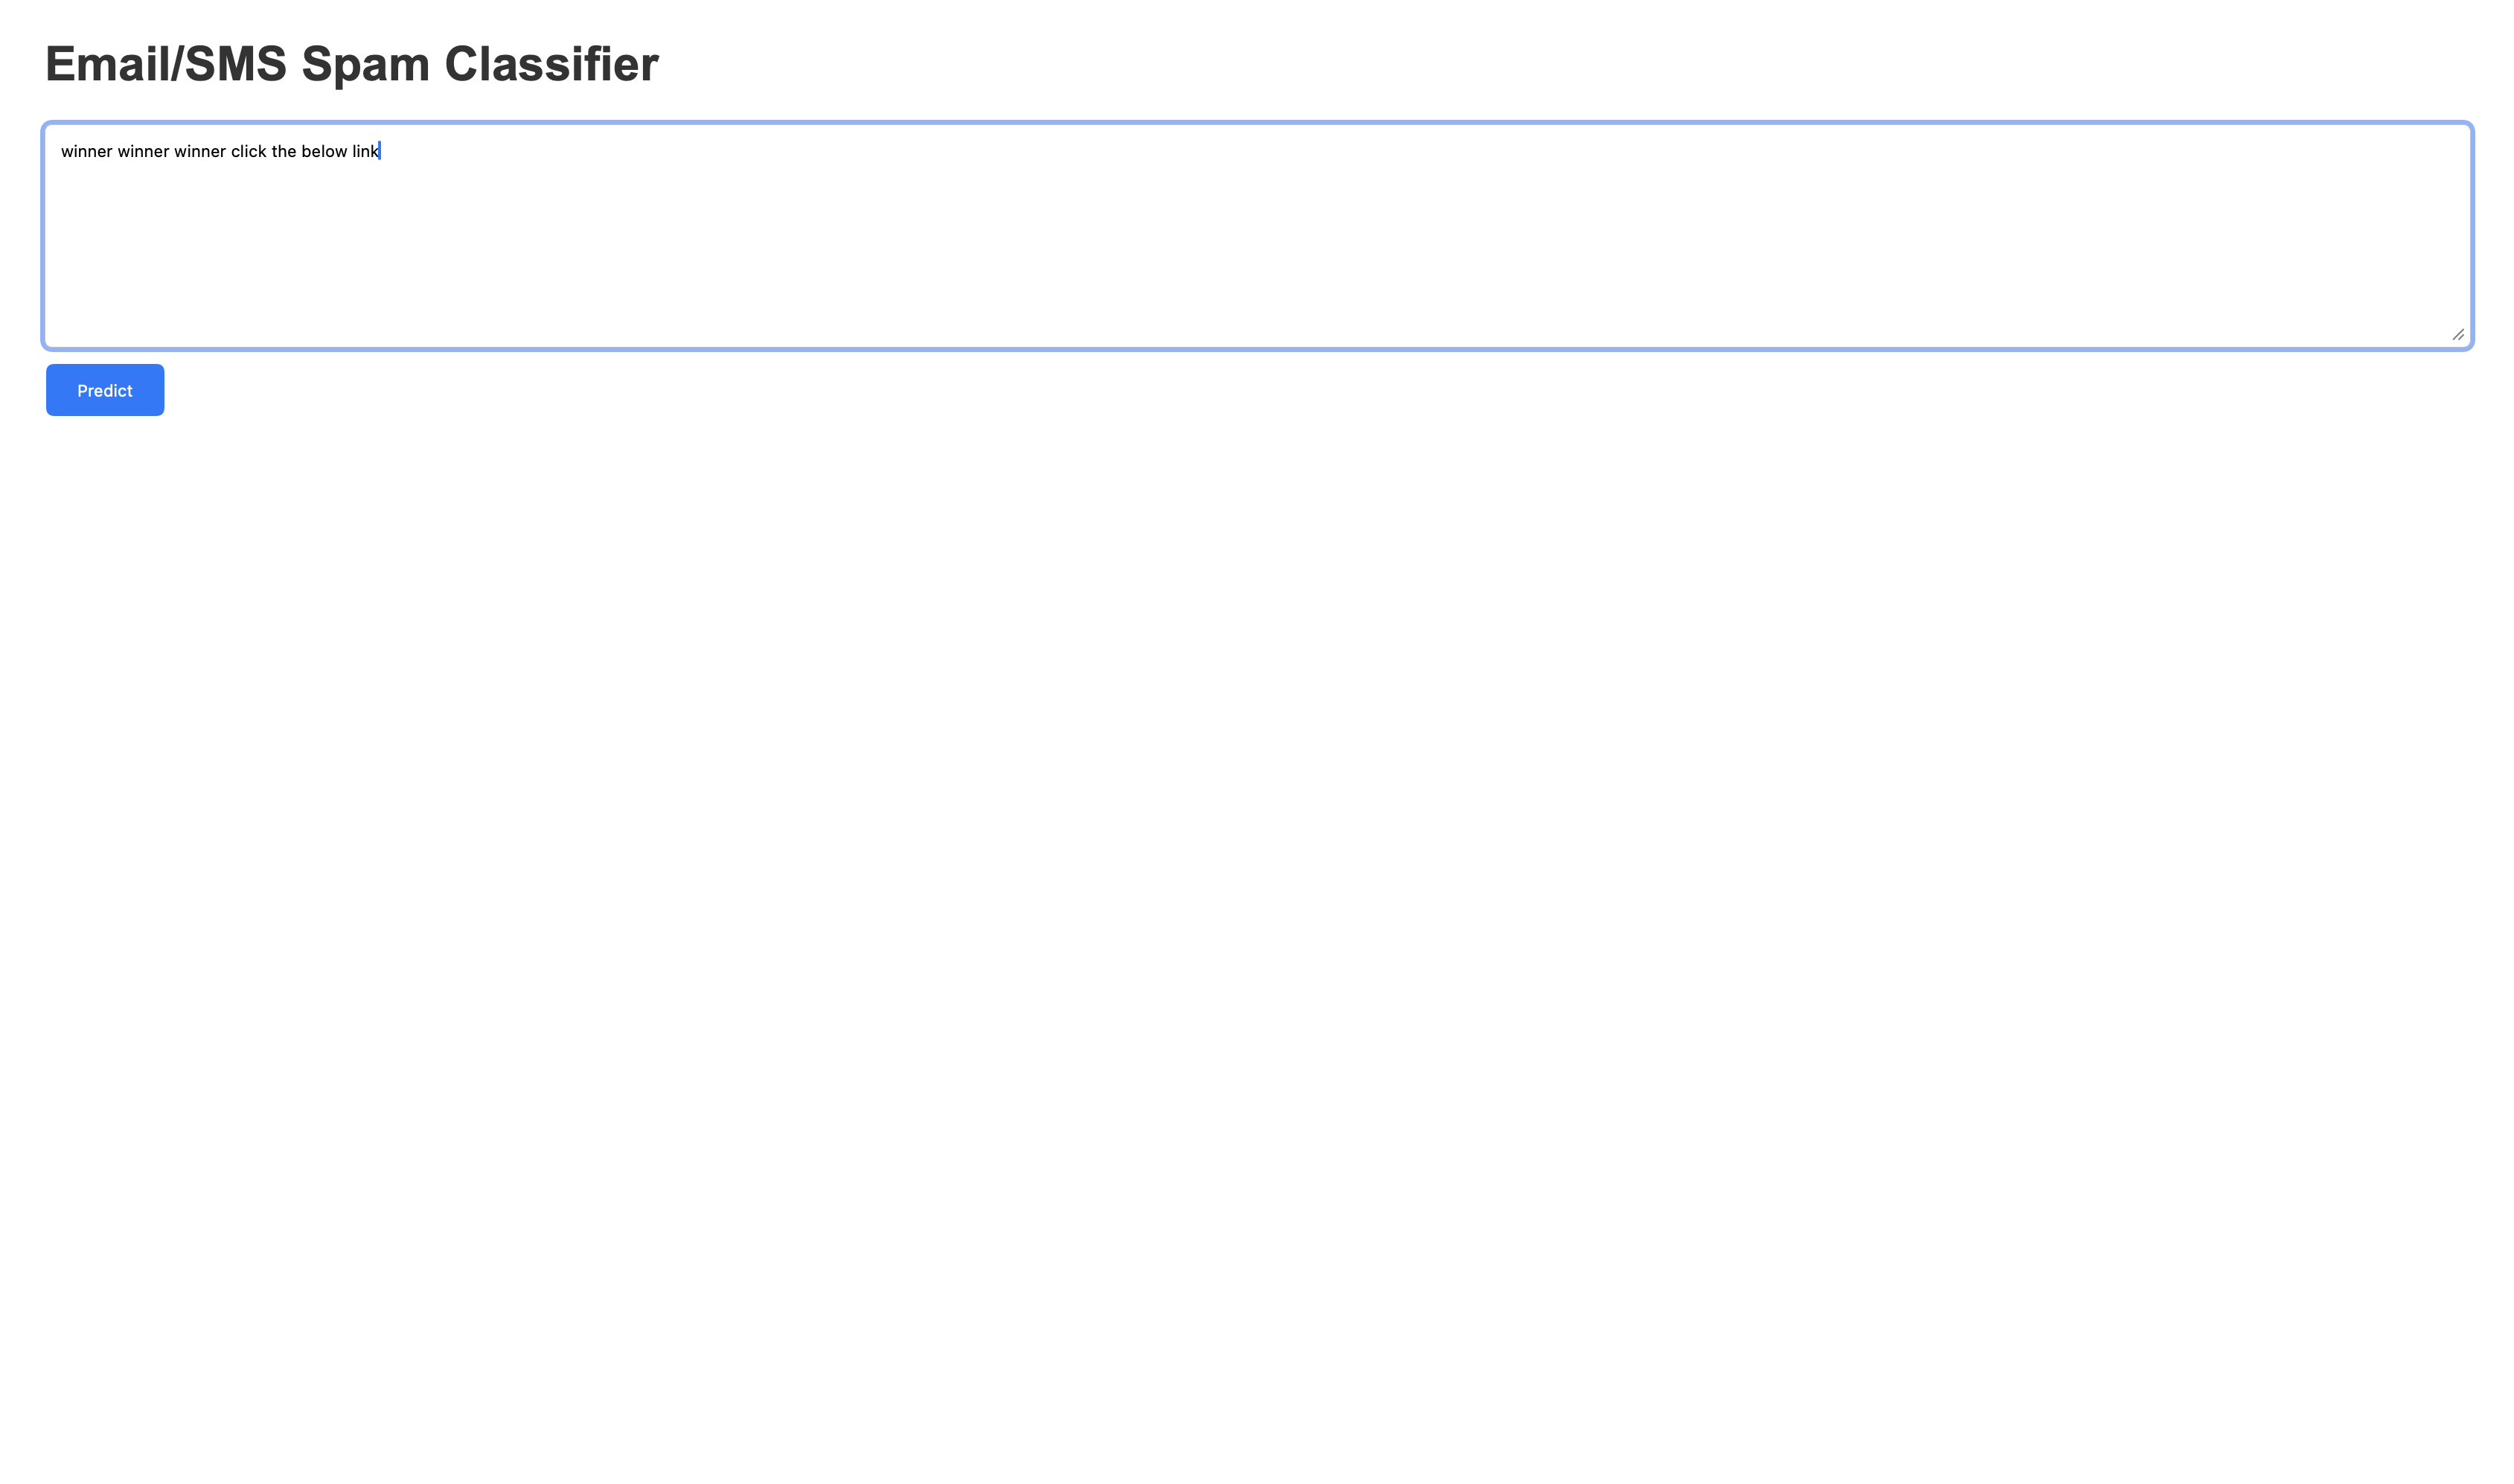

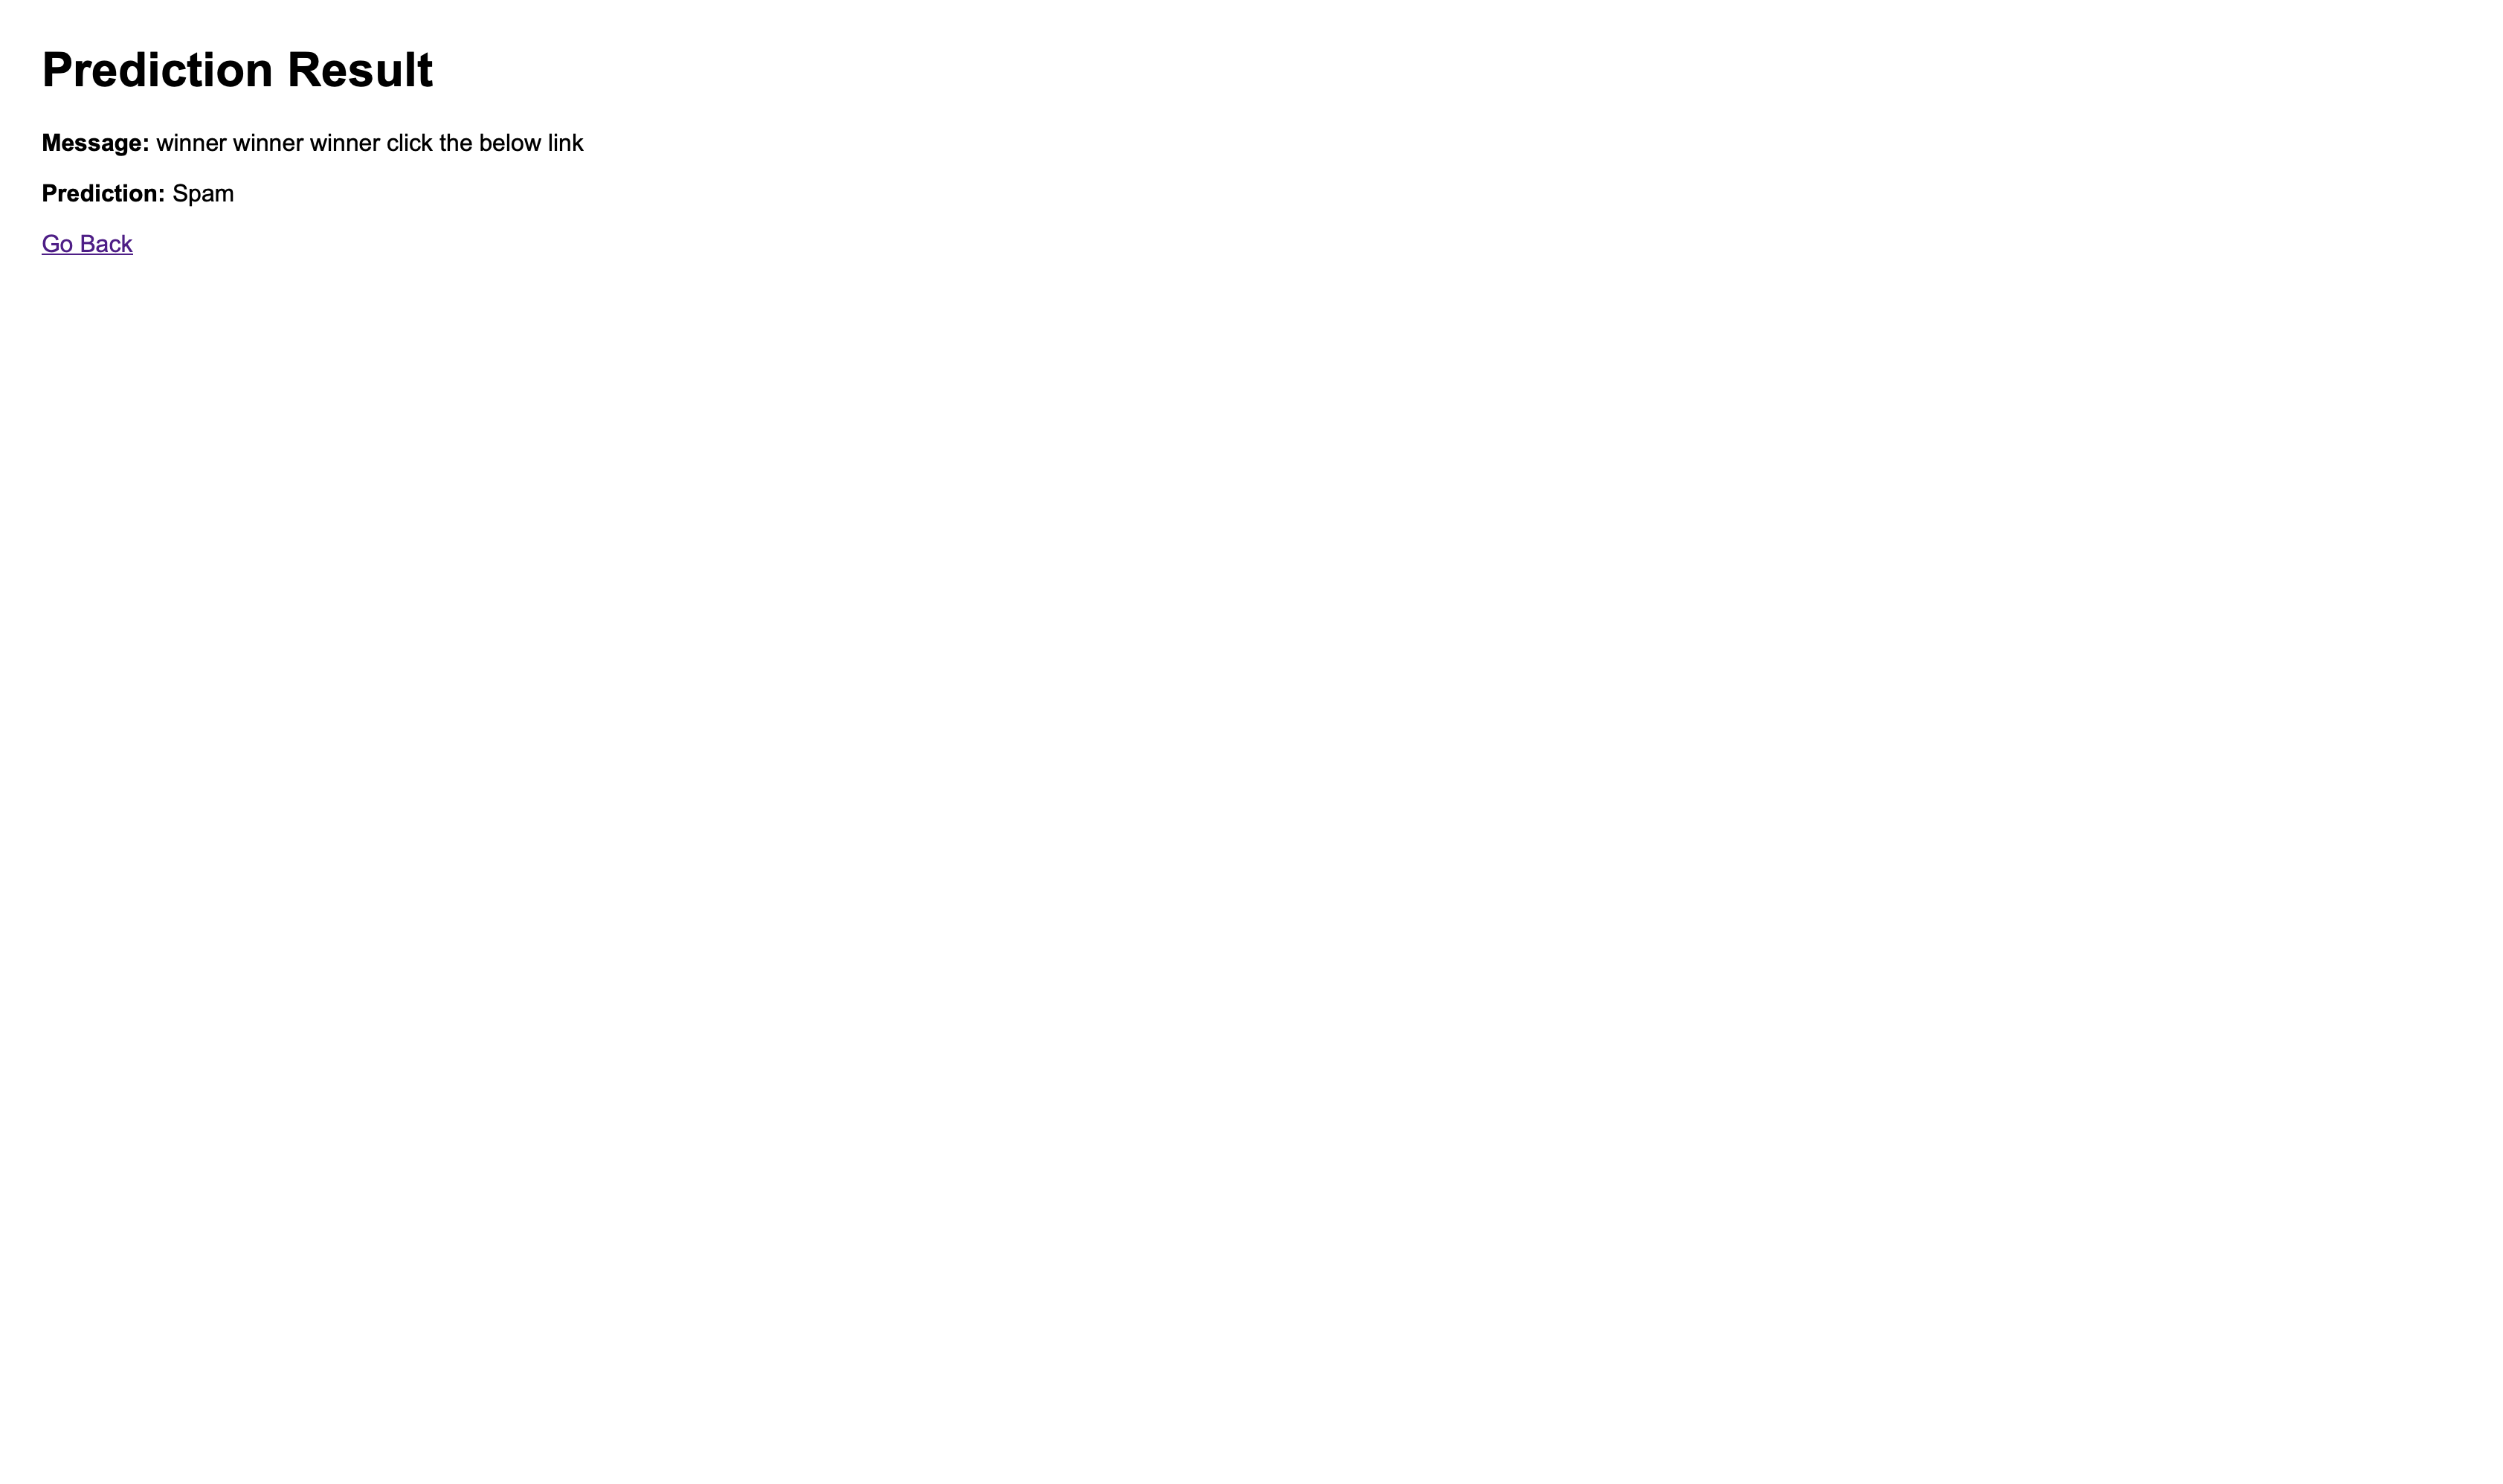

# Step 8: Deploy with Streamlit
Run the cells below to write the Streamlit app file and deploy it with a public shareable link.

saves the pkl files:

In [49]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [50]:
app_code = '''import streamlit as st
import pickle
import nltk
import string
import time
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

ps = PorterStemmer()

def text_transform(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
        y.clear()
    for i in message:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    message = y[:]
    y.clear()
    for i in message:
        y.append(ps.stem(i))
    return " ".join(y)

tfidf = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))

if "history" not in st.session_state:
    st.session_state.history = []
if "result" not in st.session_state:
    st.session_state.result = None
if "input_text" not in st.session_state:
    st.session_state.input_text = ""

st.set_page_config(page_title="SpamShield AI", page_icon="🛡️", layout="centered", initial_sidebar_state="collapsed")

st.markdown("""
<link href="https://fonts.googleapis.com/css2?family=Syne:wght@400;600;700;800&family=DM+Mono:wght@300;400;500&display=swap" rel="stylesheet">
<style>
html, body, .stApp { background-color: #080b14 !important; color: #e8eaf0; font-family: "Syne", sans-serif; }
#MainMenu, footer, header { display: none !important; }
.block-container { padding: 2rem 1.5rem 4rem !important; max-width: 760px !important; }
.stApp::before { content:""; position:fixed; inset:0; background-image:linear-gradient(rgba(0,255,180,0.025) 1px,transparent 1px),linear-gradient(90deg,rgba(0,255,180,0.025) 1px,transparent 1px); background-size:44px 44px; pointer-events:none; z-index:0; animation:gridPulse 6s ease-in-out infinite; }
@keyframes gridPulse { 0%,100%{opacity:.4} 50%{opacity:1} }
@keyframes fadeDown { from{opacity:0;transform:translateY(-18px)} to{opacity:1;transform:translateY(0)} }
@keyframes fadeUp   { from{opacity:0;transform:translateY(14px)}  to{opacity:1;transform:translateY(0)} }
@keyframes resultPop { from{opacity:0;transform:scale(.82)} to{opacity:1;transform:scale(1)} }
.hero { text-align:center; padding:3rem 0 1.5rem; }
.hero-badge { display:inline-block; background:rgba(0,255,180,0.08); border:1px solid rgba(0,255,180,0.25); color:#00ffb4; font-family:"DM Mono",monospace; font-size:.68rem; letter-spacing:.2em; padding:5px 16px; border-radius:20px; margin-bottom:1.4rem; animation:fadeDown .5s ease forwards; }
.hero-title { font-size:clamp(2.6rem,8vw,4.2rem); font-weight:800; line-height:1.05; letter-spacing:-.03em; margin-bottom:.8rem; animation:fadeDown .6s ease forwards; }
.hero-title .green { color:#00ffb4; } .hero-title .dim { color:#1e2540; }
.hero-sub { font-family:"DM Mono",monospace; font-size:.8rem; color:#3a4060; letter-spacing:.08em; }
.stats-row { display:flex; gap:.75rem; margin:2rem 0 1.5rem; }
.stat-card { flex:1; background:rgba(255,255,255,0.03); border:1px solid rgba(255,255,255,0.06); border-radius:14px; padding:.9rem .5rem; text-align:center; transition:border-color .3s,background .3s,transform .3s; }
.stat-card:hover { border-color:rgba(0,255,180,0.3); background:rgba(0,255,180,0.04); transform:translateY(-3px); }
.stat-value { font-size:1.5rem; font-weight:800; color:#00ffb4; }
.stat-label { font-family:"DM Mono",monospace; font-size:.6rem; color:#3a4060; letter-spacing:.12em; text-transform:uppercase; margin-top:3px; }
.input-panel { background:rgba(255,255,255,0.025); border:1px solid rgba(255,255,255,0.07); border-radius:20px; padding:1.8rem 1.8rem 1.2rem; margin:0 0 1rem; transition:border-color .3s; }
.input-panel:hover { border-color:rgba(0,255,180,0.15); }
.input-label { font-family:"DM Mono",monospace; font-size:.68rem; letter-spacing:.15em; color:#00ffb4; text-transform:uppercase; margin-bottom:.6rem; }
.stTextArea textarea { background:rgba(0,0,0,0.5) !important; border:1px solid rgba(255,255,255,0.08) !important; border-radius:12px !important; color:#e8eaf0 !important; font-family:"DM Mono",monospace !important; font-size:.88rem !important; line-height:1.75 !important; padding:1rem !important; caret-color:#00ffb4 !important; }
.stTextArea textarea:focus { border-color:rgba(0,255,180,0.45) !important; box-shadow:0 0 0 3px rgba(0,255,180,0.07) !important; }
.stTextArea textarea::placeholder { color:#2a3050 !important; }
.stTextArea label { display:none !important; }
.counter-bar { display:flex; justify-content:space-between; margin-top:.4rem; font-family:"DM Mono",monospace; font-size:.7rem; color:#2a3050; }
.counter-bar .active { color:#00ffb4; } .counter-bar .warn { color:#ffb400; }
.stButton > button { background:linear-gradient(135deg,#00ffb4,#00d4ff) !important; color:#080b14 !important; font-family:"Syne",sans-serif !important; font-weight:700 !important; font-size:.95rem !important; border:none !important; border-radius:12px !important; padding:.8rem 2rem !important; width:100% !important; transition:all .25s ease !important; box-shadow:0 4px 20px rgba(0,255,180,0.2) !important; }
.stButton > button:hover { transform:translateY(-2px) !important; box-shadow:0 8px 28px rgba(0,255,180,0.35) !important; }
.result-card { border-radius:20px; padding:2.2rem 2rem; text-align:center; margin:1.5rem 0; animation:resultPop .5s cubic-bezier(.34,1.56,.64,1) forwards; position:relative; overflow:hidden; }
.result-spam { background:linear-gradient(135deg,rgba(255,50,50,.13),rgba(255,0,90,.08)); border:1px solid rgba(255,50,50,.35); color:#ff4040; }
.result-ham  { background:linear-gradient(135deg,rgba(0,255,180,.1),rgba(0,210,255,.06));  border:1px solid rgba(0,255,180,.35); color:#00ffb4; }
.result-icon { font-size:2.8rem; margin-bottom:.4rem; }
.result-title { font-size:2.4rem; font-weight:800; letter-spacing:-.02em; margin-bottom:.4rem; }
.result-desc { font-family:"DM Mono",monospace; font-size:.75rem; opacity:.6; letter-spacing:.05em; }
.conf-wrap { margin:.9rem auto 0; max-width:280px; }
.conf-label { font-family:"DM Mono",monospace; font-size:.65rem; color:#3a4060; text-align:left; margin-bottom:5px; letter-spacing:.1em; }
.conf-bg { background:rgba(255,255,255,0.06); border-radius:99px; height:5px; overflow:hidden; }
.conf-fill { height:100%; border-radius:99px; }
.warn-box { background:rgba(255,180,0,.07); border:1px solid rgba(255,180,0,.25); border-radius:12px; padding:.9rem 1.2rem; font-family:"DM Mono",monospace; font-size:.8rem; color:#ffb400; margin:1rem 0; }
.section-label { font-family:"DM Mono",monospace; font-size:.68rem; letter-spacing:.15em; color:#2a3050; text-transform:uppercase; margin:1.8rem 0 .7rem; }
.hist-item { display:flex; align-items:center; gap:.8rem; padding:.7rem 1rem; border-radius:10px; background:rgba(255,255,255,0.02); border:1px solid rgba(255,255,255,0.04); margin-bottom:.4rem; font-family:"DM Mono",monospace; font-size:.75rem; transition:border-color .2s; }
.hist-item:hover { border-color:rgba(255,255,255,0.1); }
.hist-badge { font-size:.6rem; font-weight:700; padding:3px 8px; border-radius:6px; white-space:nowrap; letter-spacing:.08em; }
.badge-spam { background:rgba(255,50,50,.12); color:#ff4040; border:1px solid rgba(255,50,50,.25); }
.badge-ham  { background:rgba(0,255,180,.08); color:#00ffb4; border:1px solid rgba(0,255,180,.25); }
.hist-msg { flex:1; overflow:hidden; text-overflow:ellipsis; white-space:nowrap; color:#2a3050; }
.div { border:none; border-top:1px solid rgba(255,255,255,0.05); margin:1.8rem 0; }
.footer { text-align:center; font-family:"DM Mono",monospace; font-size:.65rem; color:#1e2540; letter-spacing:.1em; padding-top:.5rem; }
.stSpinner > div { border-top-color:#00ffb4 !important; }
</style>
""", unsafe_allow_html=True)

st.markdown("""
<div class="hero">
    <div class="hero-badge">⚡ MULTINOMIAL NAIVE BAYES · TF-IDF</div>
    <div class="hero-title">Spam<span class="green">Shield</span><br><span class="dim">AI Detector</span></div>
    <div class="hero-sub">// classify &nbsp;·&nbsp; analyse &nbsp;·&nbsp; protect</div>
</div>""", unsafe_allow_html=True)

st.markdown("""
<div class="stats-row">
    <div class="stat-card"><div class="stat-value">97%</div><div class="stat-label">Accuracy</div></div>
    <div class="stat-card"><div class="stat-value">100%</div><div class="stat-label">Precision</div></div>
    <div class="stat-card"><div class="stat-value">3K</div><div class="stat-label">Features</div></div>
    <div class="stat-card"><div class="stat-value">5.5K</div><div class="stat-label">Training Msgs</div></div>
</div>""", unsafe_allow_html=True)

st.markdown("<div class=\\"input-panel\\"><div class=\\"input-label\\">//  Input Message</div>", unsafe_allow_html=True)
input_msg = st.text_area("msg", height=140, placeholder="Paste any SMS or email message here...", value=st.session_state.input_text, key="msg_input")
if input_msg:
    chars, words = len(input_msg), len(input_msg.split())
    wc = "warn" if chars > 300 else "active"
    wt = "⚠️ Very long" if chars > 300 else "✓ Normal"
    st.markdown(f"<div class=\\"counter-bar\\"><span class=\\"active\\">{chars} chars · {words} words</span><span class=\\"{wc}\\">{wt}</span></div>", unsafe_allow_html=True)
st.markdown("</div>", unsafe_allow_html=True)

predict_btn = st.button("🛡️ Analyse Message", key="predict")

if predict_btn:
    if not input_msg.strip():
        st.markdown("<div class=\\"warn-box\\">⚠️ Please enter a message to analyse.</div>", unsafe_allow_html=True)
    else:
        with st.spinner("Scanning..."):
            time.sleep(0.6)
            transformed = text_transform(input_msg)
            vector = tfidf.transform([transformed])
            result = model.predict(vector)[0]
            proba  = model.predict_proba(vector)[0]
            confidence = int(proba[result] * 100)
            st.session_state.result = (result, confidence)
            label   = "SPAM" if result == 1 else "HAM"
            snippet = input_msg[:65] + "..." if len(input_msg) > 65 else input_msg
            st.session_state.history.insert(0, (label, snippet))
            if len(st.session_state.history) > 5:
                st.session_state.history = st.session_state.history[:5]

if st.session_state.result is not None:
    result, confidence = st.session_state.result
    if result == 1:
        st.markdown(f"""<div class="result-card result-spam"><div class="result-icon">🚨</div><div class="result-title">SPAM</div><div class="result-desc">Suspicious — do not click links or share personal info.</div><div class="conf-wrap"><div class="conf-label">CONFIDENCE · {confidence}%</div><div class="conf-bg"><div class="conf-fill" style="width:{confidence}%;background:linear-gradient(90deg,#ff4040,#ff0064);"></div></div></div></div>""", unsafe_allow_html=True)
    else:
        st.markdown(f"""<div class="result-card result-ham"><div class="result-icon">✅</div><div class="result-title">NOT SPAM</div><div class="result-desc">This message appears safe and legitimate.</div><div class="conf-wrap"><div class="conf-label">CONFIDENCE · {confidence}%</div><div class="conf-bg"><div class="conf-fill" style="width:{confidence}%;background:linear-gradient(90deg,#00ffb4,#00d4ff);"></div></div></div></div>""", unsafe_allow_html=True)

st.markdown("<div class=\\"section-label\\">//  Try an example</div>", unsafe_allow_html=True)

examples = [
    ("🚨 Spam #1", "WINNER!! You have been selected for a £1000 prize. Call 0800-XXX now!"),
    ("🚨 Spam #2", "FREE entry: text WIN to 83600. You could win £200 cash. T&C apply."),
    ("✅ Ham #1",  "Hey, are we still on for lunch tomorrow at 1pm? Let me know!"),
    ("✅ Ham #2",  "Don't forget to pick up milk and eggs on your way home. Thanks!"),
]
col1, col2 = st.columns(2)
for i, (label, msg) in enumerate(examples):
    with (col1 if i % 2 == 0 else col2):
        if st.button(label, key=f"ex_{i}"):
            transformed = text_transform(msg)
            vector = tfidf.transform([transformed])
            result = model.predict(vector)[0]
            proba  = model.predict_proba(vector)[0]
            confidence = int(proba[result] * 100)
            st.session_state.result = (result, confidence)
            st.session_state.input_text = msg
            snippet = msg[:65] + "..." if len(msg) > 65 else msg
            lbl = "SPAM" if result == 1 else "HAM"
            st.session_state.history.insert(0, (lbl, snippet))
            st.rerun()

if st.session_state.history:
    st.markdown("<hr class=\\"div\\"><div class=\\"section-label\\">//  Recent checks</div>", unsafe_allow_html=True)
    for label, snippet in st.session_state.history:
        bc = "badge-spam" if label == "SPAM" else "badge-ham"
        st.markdown(f"<div class=\\"hist-item\\"><span class=\\"hist-badge {bc}\\">{label}</span><span class=\\"hist-msg\\">{snippet}</span></div>", unsafe_allow_html=True)
    if st.button("🗑️ Clear History"):
        st.session_state.history = []
        st.session_state.result  = None
        st.rerun()

st.markdown("<hr class=\\"div\\"><div class=\\"footer\\">SPAMSHIELD AI · MULTINOMIAL NAIVE BAYES · TF-IDF · BUILT WITH STREAMLIT</div>", unsafe_allow_html=True)
'''

with open('/content/app.py', 'w') as f:
    f.write(app_code)

print("✅ app.py written successfully!")

✅ app.py written successfully!


Verify the files exist:

In [51]:
import os
print(os.listdir())  # should show vectorizer.pkl and model.pkl in the list

['.config', 'vectorizer.pkl', 'cloudflared-linux-amd64.deb', 'spam.csv', '__pycache__', 'model.pkl', 'main.py', 'nohup.out', 'app.py', 'sample_data']


In [52]:
!pkill -f streamlit
!pkill -f cloudflared
import time
time.sleep(3)
print("✅ Cleared")

✅ Cleared


In [53]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

--2026-02-25 12:31:38--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64.deb [following]
--2026-02-25 12:31:38--  https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/4fddf4d7-e02d-44dc-9e5a-ef9e28afdd54?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-25T13%3A23%3A19Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&

In [54]:
import subprocess, threading, time

def run_streamlit():
    subprocess.run(['streamlit', 'run', 'app.py', '--server.port=8501', '--server.headless=true'])

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()
time.sleep(5)

!cloudflared tunnel --url http://localhost:8501 --no-autoupdate

Exception in thread Thread-4 (run_streamlit):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-3650834882.py", line 4, in run_streamlit
  File "/usr/lib/python3.12/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.12/subprocess.py", line 1955, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
FileNotFoundError: [Errno 2] No such file or directory: 'streamlit'


2026-02-25T12:31:44Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-25T12:31:44Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-25T12:31:46Z INF +--------------------------------------------------------------------------------------------+
2026-02-25T12:31:46Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-25T12:31:46Z INF |  https://danny-nonprofit-was-average.trycloudflare.com